In [1]:
def calculate_real_accuracy(df):
    metrics_df = df[['output_discount','output_prediction']]
    correct = 0
    incorrect = 0
    for index,row in metrics_df.iterrows():
        
        if row['output_discount'] == row['output_prediction']:
            correct += 1
        else:
            incorrect += 1
    acc = correct/(correct+incorrect)
    return acc


In [3]:
from whylogs.datasets import Ecommerce

dataset = Ecommerce()

baseline = dataset.get_baseline()

In [4]:
baseline.prediction.head()

,output_prediction,output_score
date,,
2023-02-06 00:00:00+00:00,1,0.523833
2023-02-06 00:00:00+00:00,0,0.980000
2023-02-06 00:00:00+00:00,0,0.872500
2023-02-06 00:00:00+00:00,1,0.970000
2023-02-06 00:00:00+00:00,0,0.859203


In [5]:
def arrange_df(batch):
    df = batch.features
    df['output_discount'] = batch.target['output_discount']
    df['output_prediction'] = batch.prediction['output_prediction']
    return df

reference_df = arrange_df(baseline)
reference_df

/tmp/ipykernel_1131/2206326473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_discount'] = batch.target['output_discount']
/tmp/ipykernel_1131/2206326473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_prediction'] = batch.prediction['output_prediction']


,product,sales_last_week,market_price,rating,category,output_discount,output_prediction
date,,,,,,,
2023-02-06 00:00:00+00:00,Wood - Centre Filled Bar Infused With Dark Mou...,1,350.0,4.500000,Snacks and Branded Foods,0,1
2023-02-06 00:00:00+00:00,Toasted Almonds,1,399.0,3.944479,Gourmet and World Food,1,0
2023-02-06 00:00:00+00:00,Instant Thai Noodles - Hot & Spicy Tomyum,1,95.0,3.300000,Gourmet and World Food,0,0
2023-02-06 00:00:00+00:00,Thokku - Vathakozhambu,1,336.0,4.300000,Snacks and Branded Foods,0,1
2023-02-06 00:00:00+00:00,Beetroot Powder,1,150.0,3.944479,Gourmet and World Food,0,0
...,...,...,...,...,...,...,...
2023-02-13 00:00:00+00:00,Taft Ultimate Wax,3,425.0,3.974083,Beauty and Hygiene,0,0
2023-02-13 00:00:00+00:00,Steel Induction Bottom Tope/Patila/Bhagona - N...,1,339.0,4.100000,"Kitchen, Garden and Pets",1,1
2023-02-13 00:00:00+00:00,Soothing Face Mask,1,125.0,4.000000,Beauty and Hygiene,1,0


In [6]:
reference_df

,product,sales_last_week,market_price,rating,category,output_discount,output_prediction
date,,,,,,,
2023-02-06 00:00:00+00:00,Wood - Centre Filled Bar Infused With Dark Mou...,1,350.0,4.500000,Snacks and Branded Foods,0,1
2023-02-06 00:00:00+00:00,Toasted Almonds,1,399.0,3.944479,Gourmet and World Food,1,0
2023-02-06 00:00:00+00:00,Instant Thai Noodles - Hot & Spicy Tomyum,1,95.0,3.300000,Gourmet and World Food,0,0
2023-02-06 00:00:00+00:00,Thokku - Vathakozhambu,1,336.0,4.300000,Snacks and Branded Foods,0,1
2023-02-06 00:00:00+00:00,Beetroot Powder,1,150.0,3.944479,Gourmet and World Food,0,0
...,...,...,...,...,...,...,...
2023-02-13 00:00:00+00:00,Taft Ultimate Wax,3,425.0,3.974083,Beauty and Hygiene,0,0
2023-02-13 00:00:00+00:00,Steel Induction Bottom Tope/Patila/Bhagona - N...,1,339.0,4.100000,"Kitchen, Garden and Pets",1,1
2023-02-13 00:00:00+00:00,Soothing Face Mask,1,125.0,4.000000,Beauty and Hygiene,1,0


In [7]:
def calculate_reference_accuracy(df):
    acc_per_group = {}
    # df subgroups by category column
    for category, df in df.groupby('category'):
        # calculate accuracy for each subgroup
        acc = (df['output_discount'] == df['output_prediction']).mean()
        acc_per_group[category] = acc
    return acc_per_group

acc_per_group = calculate_reference_accuracy(reference_df)
acc_per_group['all'] = calculate_real_accuracy(reference_df)

acc_per_group

{'Baby Care': 0.7553041018387553,
 'Bakery, Cakes and Dairy': 0.7191011235955056,
 'Beauty and Hygiene': 0.6799754926988666,
 'Beverages': 0.539651837524178,
 'Cleaning and Household': 0.622460824143935,
 'Eggs, Meat and Fish': 0.5570175438596491,
 'Foodgrains, Oil and Masala': 0.6188296829029094,
 'Fruits and Vegetables': 0.9732977303070761,
 'Gourmet and World Food': 0.6210288663118851,
 'Kitchen, Garden and Pets': 0.8094814155352771,
 'Snacks and Branded Foods': 0.6424464192368008,
 'all': 0.6741501885271853}

In [8]:
import numpy as np


def random_subsample_on_column(df, column, lower_pct=0.1 , upper_pct=0.3, classes = 'all'):
    """Subsample each class in a column to a random percentage of the total.

    The percentage is sampled uniformly between lower_pct and upper_pct.
    If classes is not 'all', then only subsample the classes in classes.

    Args:
        df (pd.DataFrame): The dataframe to subsample.
        column (str): The column to subsample on.
        lower_pct (float): The lower bound of the percentage to subsample.
        upper_pct (float): The upper bound of the percentage to subsample.
        classes (list): The classes to subsample. If 'all', then subsample all classes.

    """
    if classes == 'all':
        class_names = df[column].unique()
    elif isinstance(classes, list):
        assert all([c in df[column].unique() for c in classes]), "Classes must be in the column"
        class_names = classes
    for c in class_names:
        sub_df = df.loc[df[column]==c]
        n = int(len(sub_df) * (lower_pct + (upper_pct - lower_pct) * np.random.random()))
        # remove n rows from the class
        df = df.loc[df[column] != c].append(sub_df.sample(n=n))
    return df

In [9]:
def get_proportions_from_df(df):
    proportions = {}
    for category, sub_df in df.groupby('category'):
        proportions[category] = len(sub_df)/len(df)
    return proportions

def estimate_accuracy(df, reference_results):
    proportions = get_proportions_from_df(df)
    partials = []
    for category, proportion in proportions.items():
        partials.append(proportion * reference_results[category])
    return sum(partials)


Day 0 accuracy - real: 0.6388225934765315, estimated: 0.6372135426512939, baseline: 0.6741501885271853
Day 1 accuracy - real: 0.6881549698316926, estimated: 0.6918031658398406, baseline: 0.6741501885271853
Day 2 accuracy - real: 0.636327817178881, estimated: 0.6447639937834951, baseline: 0.6741501885271853
Day 3 accuracy - real: 0.6938714499252616, estimated: 0.6867824007038836, baseline: 0.6741501885271853
Day 4 accuracy - real: 0.6718907987866531, estimated: 0.6647893708181437, baseline: 0.6741501885271853
Day 5 accuracy - real: 0.6601212821253248, estimated: 0.6522812330472973, baseline: 0.6741501885271853
Day 6 accuracy - real: 0.6889425657541599, estimated: 0.685298127647254, baseline: 0.6741501885271853


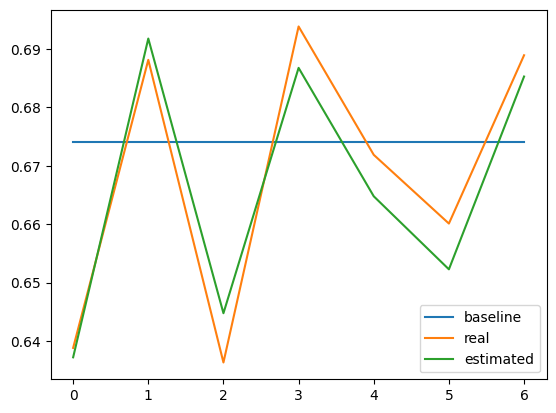

Estimated MSE: 3.7500093013185685e-05, Baseline MSE: 0.0005263374682638923


In [10]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

batches = dataset.get_inference_data(number_batches=7)

perturbations_by_day = {
    0 : ['Kitchen, Garden and Pets','Beauty and Hygiene', 'Fruits and Vegetables','Bakery, Cakes and Dairy'],
    1 : ['Snacks and Branded Foods','Beverages', 'Baby Care', 'Gourmet and World Food'],
    2 : ['Beauty and Hygiene','Kitchen, Garden and Pets', 'Bakery, Cakes and Dairy','Fruits and Vegetables'],
    3 : ['Foodgrains, Oil and Masala','Cleaning and Household','Eggs, Meat and Fish','Bakery, Cakes and Dairy'],
    4 : ['Cleaning and Household','Gourmet and World Food','Kitchen, Garden and Pets','Beauty and Hygiene'],
    5 : ['Baby Care','Bakery, Cakes and Dairy','Kitchen, Garden and Pets'],
    6 : ['Beverages', 'Eggs, Meat and Fish', 'Foodgrains, Oil and Masala'],

    }

baseline_accs = []
real_accs = []
estimated_accs = []
perturbed_dfs = []
for day, batch in enumerate(batches):
    unperturbed_df = arrange_df(batch)
    # un_acc = calculate_real_accuracy(unperturbed_df)
    # print(f"Day {day} accuracy - unperturbed: {calculate_real_accuracy(unperturbed_df)}")

    perturbed_df = random_subsample_on_column(unperturbed_df, 'category', lower_pct=0.1, upper_pct=0.3, classes = perturbations_by_day[day])
    perturbed_dfs.append(perturbed_df)
    estimated_acc = estimate_accuracy(perturbed_df, acc_per_group)
    per_acc = calculate_real_accuracy(perturbed_df)
    print(f"Day {day} accuracy - real: {per_acc}, estimated: {estimated_acc}, baseline: {acc_per_group['all']}")
    baseline_accs.append(acc_per_group['all'])
    real_accs.append(per_acc)
    estimated_accs.append(estimated_acc)
    # print(f"Day {day} accuracy: - perturbed {calculate_real_accuracy(perturbed_df)}")

import matplotlib.pyplot as plt
# plot baseline, real and estimated accuracy
plt.plot(baseline_accs, label='baseline')
plt.plot(real_accs, label='real')
plt.plot(estimated_accs, label='estimated')
plt.legend()
plt.show()

mse = np.mean((np.array(real_accs) - np.array(estimated_accs))**2)
baseline_mse = np.mean((np.array(real_accs) - np.array(baseline_accs))**2) 

print(f"Estimated MSE: {mse}, Baseline MSE: {baseline_mse}")	


# whylogs

In [11]:
import whylogs as why
from whylogs.core.segmentation_partition import segment_on_column
from whylogs.core.schema import DatasetSchema

def log_with_metrics(df):
    segment_column = "category"
    segmented_schema = DatasetSchema(segments=segment_on_column(segment_column))
    results = why.log_classification_metrics(
        df,
        target_column = "output_discount",
        prediction_column = "output_prediction",
        schema=segmented_schema,
        log_full_data=True
    )
    return results

reference_results = log_with_metrics(reference_df)

In [12]:
import warnings
def estimate_whylogs_accuracy(reference_results, target_results):
    
    if len(reference_results.partitions)> 1 and len(target_results.partitions)> 1:
        warnings.warn("More than one partition found. Only the first partition will be used for the estimation.")
    if len(reference_results.partitions) != len(target_results.partitions):
        raise ValueError("The number of partitions in the reference and target results must be the same.")

    reference_partition = reference_results.partitions[0]
    target_partition = target_results.partitions[0]

    segmented_column = reference_partition.name
    if segmented_column != target_partition.name:
        raise ValueError("The segmented columns in the reference and target results must be the same.")

    reference_segments = reference_results.segments_in_partition(reference_partition)
    target_segments = target_results.segments_in_partition(target_partition)

    if any([len(segment.key)>1 for segment in reference_segments]):
        raise ValueError("Only single key segments are supported.")
    if any([len(segment.key)>1 for segment in target_segments]):
        raise ValueError("Only single key segments are supported.")


    # make a set out of the keys in the reference segments
    reference_keys = set([segment.key[0] for segment in reference_segments])
    target_keys = set([segment.key[0] for segment in target_segments])
    if reference_keys != target_keys:
        raise ValueError("The keys in the reference and target segments must be the same.")
    reference_accuracies = {}
    for reference_segment in reference_segments:
        id = reference_segment.parent_id
        reference_conf = reference_results._segments[id][reference_segment].model_performance_metrics.confusion_matrix.confusion_matrix
        target_segment = next(segment for segment in target_segments if segment.key[0] == reference_segment.key[0])
        tp = get_cell_from_confusion_matrix(reference_conf, (1,1))
        tn = get_cell_from_confusion_matrix(reference_conf, (0,0))
        fp = get_cell_from_confusion_matrix(reference_conf, (0,1))
        fn = get_cell_from_confusion_matrix(reference_conf, (1,0))
        reference_acc = (tp+tn)/(tp+tn+fp+fn)
        reference_accuracies[reference_segment.key[0]] = reference_acc
    

    target_counts = get_segment_counts(target_results)
    reference_counts = get_segment_counts(reference_results)

    target_proportions = get_proportions(target_counts)
    reference_proportions = get_proportions(reference_counts)

    reference_accuracy  = estimate_accuracy_based_on_proportions(reference_accuracies, reference_proportions)
    estimated_accuracy = estimate_accuracy_based_on_proportions(reference_accuracies, target_proportions)

    return reference_accuracy, estimated_accuracy

def get_segment_counts(results):
    partition = results.partitions[0]
    segments = results.segments_in_partition(partition)
    segmented_column = partition.name

    counts = {}
    for segment in segments:
        id = segment.parent_id
        profile = results._segments[id][segment]
        segment_count = profile._columns[segmented_column]._metrics['counts'].n.value
        counts[segment.key[0]] = segment_count
    return counts


def estimate_accuracy_based_on_proportions(reference_accuracies, target_proportions):
    estimated_accuracy = sum([reference_accuracies[k]*target_proportions[k] for k in reference_accuracies.keys()])
    return estimated_accuracy

def get_proportions(counts):
    total = sum(counts.values())
    proportions = {k: v/total for k, v in counts.items()}
    return proportions

def get_cell_from_confusion_matrix(confusion_matrix, key):
    dist_cell = confusion_matrix.get(key,None)
    return dist_cell.n if dist_cell is not None else 0

In [13]:
baseline_accs = []
real_accs = []
estimated_accs = []
for day, perturbed_df in enumerate(perturbed_dfs):
    perturbed_result = log_with_metrics(perturbed_df)
    per_acc = calculate_real_accuracy(perturbed_df)
    reference_acc, estimated_acc = estimate_whylogs_accuracy(reference_results, perturbed_result)
    print(f"Day {day} accuracy - real: {per_acc}, estimated: {estimated_acc}, baseline: {acc_per_group['all']}, baselin2: {reference_acc}")


Day 0 accuracy - real: 0.6388225934765315, estimated: 0.6372135426512939, baseline: 0.6741501885271853, baselin2: 0.6741501885271853
Day 1 accuracy - real: 0.6881549698316926, estimated: 0.6918031658398406, baseline: 0.6741501885271853, baselin2: 0.6741501885271853
Day 2 accuracy - real: 0.636327817178881, estimated: 0.6447639937834951, baseline: 0.6741501885271853, baselin2: 0.6741501885271853
Day 3 accuracy - real: 0.6938714499252616, estimated: 0.6867824007038836, baseline: 0.6741501885271853, baselin2: 0.6741501885271853
Day 4 accuracy - real: 0.6718907987866531, estimated: 0.6647893708181437, baseline: 0.6741501885271853, baselin2: 0.6741501885271853
Day 5 accuracy - real: 0.6601212821253248, estimated: 0.6522812330472973, baseline: 0.6741501885271853, baselin2: 0.6741501885271853
Day 6 accuracy - real: 0.6889425657541599, estimated: 0.685298127647254, baseline: 0.6741501885271853, baselin2: 0.6741501885271853


# Implementation

In [1]:
from whylogs.experimental.performance_estimation import AccuracyEstimator
from whylogs.datasets import Ecommerce
import whylogs as why
from whylogs.core.segmentation_partition import segment_on_column
from whylogs.core.schema import DatasetSchema
import pandas as pd
pd.options.mode.chained_assignment = None # default='warn’

def log_with_metrics(df):
    segment_column = "category"
    segmented_schema = DatasetSchema(segments=segment_on_column(segment_column))
    results = why.log_classification_metrics(
        df,
        target_column = "output_discount",
        prediction_column = "output_prediction",
        schema=segmented_schema,
        log_full_data=True
    )
    return results

def arrange_df(batch):
    df = batch.features
    df['output_discount'] = batch.target['output_discount']
    df['output_prediction'] = batch.prediction['output_prediction']
    return df

dataset = Ecommerce()

baseline = dataset.get_baseline()
reference_df = arrange_df(baseline)
reference_results = log_with_metrics(reference_df)

estimator = AccuracyEstimator(reference_result_set = reference_results)


In [ ]:
#ideas

from whylogs.experimental.performance_estimation import AccuracyEstimator

estimator = AccuracyEstimator(reference_result_set = reference_results)

perturbed_result_sets = [results_1, results_2, results_3]
# or perturbed_dfs = [df_1, df_2, df_3]

estimated_accuracies = [estimator.estimate_accuracy(results) for results in perturbed_result_set]
# or estimated_accuracies = [estimator.estimate_accuracy(df) for df in perturbed_dfs]

real_accuracies = [get_real_acc(df) for df in perturbed_dfs]

plot_estimated_accuracies(estimated_accuracies, real_accuracies)

# imagine beautiful plot here